# PROBABILITY DISTRIBUTION WITH MATPLOTLIB & SEABORN

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

## Generating and Plotting a Normal Distribution

In [2]:
# Defining parameters
mu = 5  # Mean
sigma = 0.75   # Standard Deviation
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)   # Range for x 

Purpose of **`np.linspace`**:

For probability distribution plots (like the normal distribution), you need a smooth curve.

By taking many small, evenly spaced points, **`np.linspace`** ensures your graph doesn’t look jagged and represents the distribution accurately.

In [3]:
# Compute PDF values
pdf = norm.pdf(x,mu,sigma)

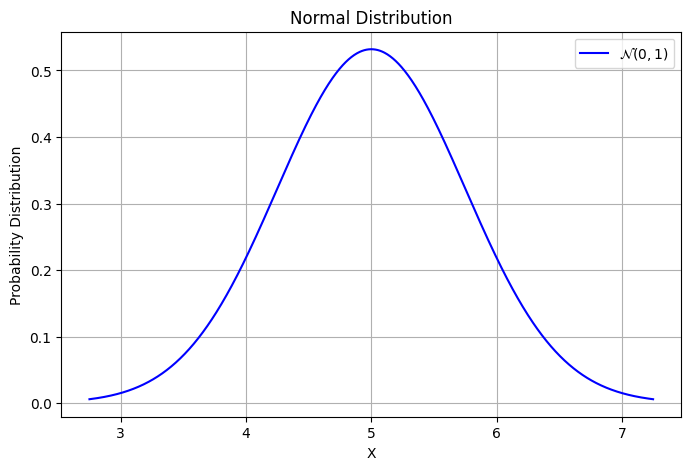

In [4]:
# Plot the normal distribution
plt.figure(figsize=(8,5))

plt.plot(x,pdf,label=r'$\mathcal{N}(0,1)$',color='b')

plt.xlabel('X')
plt.ylabel('Probability Distribution')

plt.title('Normal Distribution')

plt.legend()
plt.grid()
plt.show()

In [5]:
# Generate Synthetic Data (You can also replace the values with your actual data)
data = np.random.normal(loc=50,scale=10,size=1000)   # Where mean is 50, standard deviation or std is 10 and size is 1000

In [6]:
# Fit a normal distribution to the data
mu, sigma = np.mean(data), np.std(data)

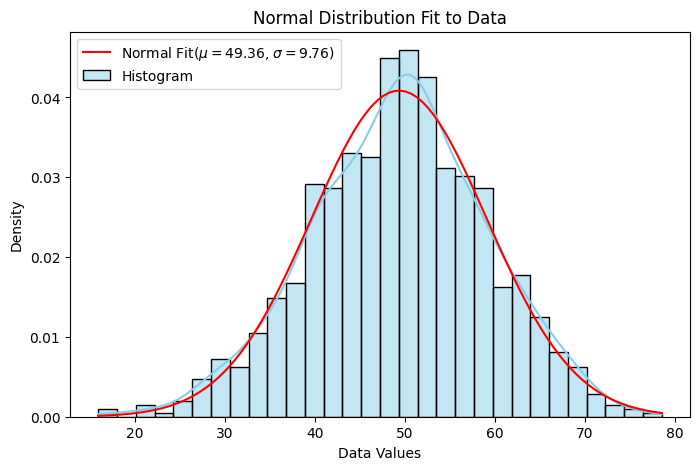

In [7]:
# Plotting Histogram and normal distribution curve
plt.figure(figsize=(8,5))
sns.histplot(data=data, bins=30, kde=True, stat='density', color='skyblue', label='Histogram')

# Generate the x values for normal distribution curve
x = np.linspace(min(data), max(data),100)
pdf = norm.pdf(x, mu, sigma)

plt.plot(x,pdf,'r',label=fr'Normal Fit($\mu={mu:.2f}$, $\sigma={sigma:.2f}$)')

plt.xlabel('Data Values')
plt.ylabel('Density')

plt.title('Normal Distribution Fit to Data')
plt.legend()
plt.show()

In Seaborn’s histplot, the stat parameter controls what the height of the bars represents.

* stat='density' → the heights of the bars are scaled so that the total area under the histogram equals 1.

This makes it possible to overlay a probability density function (like a normal curve) on the same plot, because both will be on the same scale.

#### Common stat options:

| `stat` value          | Meaning                                                          |
| --------------------- | ---------------------------------------------------------------- |
| `'count'` *(default)* | Height = number of observations in each bin.                     |
| `'frequency'`         | Height = proportion of data points in each bin (counts / total). |
| `'probability'`       | Same as frequency, often used interchangeably.                   |
| `'density'`           | Height scaled so total area = 1 (good for probability curves).   |
| `'percent'`           | Height = percentage in each bin (frequency × 100).               |

#### Why 'density' here?

Because when we are plotting a normal distribution curve along with the histogram. A probability density function (PDF) is also normalized so that it's total area is 1 — by using `stat='density'` **ensures they match and align correctly**.

The tips dataset is well known dataset in seaborn containing informationn about the restaurant tips.

Below is a python script to:
* Load the tips dataset
* Plot normal distribution of the total_bill column

In [8]:
df = sns.load_dataset('tips')
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
bill_data = df.total_bill

In [11]:
# Computing the mean and the standerd deviation
mu, sigma = np.mean(bill_data), np.std(bill_data)

You use this or you can just use the respective value from **df.describe()**

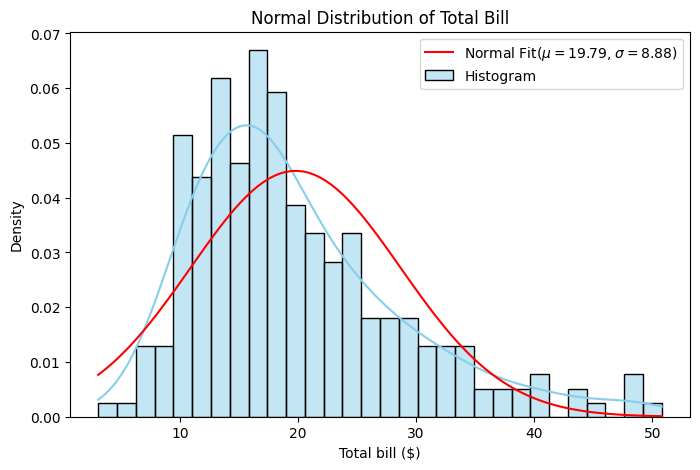

In [12]:
plt.figure(figsize=(8,5))

# Plotting the histogram and the normal distribution curve
sns.histplot(data=bill_data, bins=30, kde=True, stat='density', color='skyblue', label='Histogram')

# Generate the x values for normal distribution curve
x = np.linspace(min(bill_data), max(bill_data),100)
pdf = norm.pdf(x, mu, sigma)

plt.plot(x,pdf,'r',label=fr'Normal Fit($\mu={mu:.2f}$, $\sigma={sigma:.2f}$)')

plt.xlabel('Total bill ($)')
plt.ylabel('Density')

plt.title('Normal Distribution of Total Bill')
plt.legend()
plt.show()

### Interpretation of the Normal Distribution of total_bill (Tips Dataset)

1. Shape of the distribution:

* The Histogram shows the distribution of the total bills paid at a restaurent.
* The red curve represents the fitted normal distribution based on the dataset's mean($\mu$) and standered deviation($\sigma$).
* If the Histogram closely follows the normal curve, the data is approximately normally distributed.

2. Mean($\mu$) and Standered Deviation($\sigma$):

* The mean($\mu$) represents the average total bill amount.
* The standered deviation($\sigma$) indicates how much the total bill varies from the mean.
* A smaller $\sigma$ suggests that the most bills are close to the mean whereas large $\sigma$ indicates more variation.

3. Skewness and Normality check:

* If the histogram is symmetrical around the mean the data is normally distributed.
* If the right tail is longer(right-skewed), it suggests that a few customers paid significantly higher bills.
* If the left tail is longer(left-skewed), it means some unsually low bills were recorded.

4. Final Insights:

* If the normal curve fits well, we can apply statistical methods like hypothesis testing, confidence intervals and predictive modelling.
* If the distribution is skewed transformations(e.g. log transformation) or non-parametric methods may be needed for further analysis.

## Generating and Plotting Binomial Distribution

In [13]:
from scipy.stats import binom

In [14]:
# Defining Paarmeter
n = 10    # Number of trials
p = 0.5   # Probability of sucess

# Generating possible values of k (0 to n)
k = np.arange(0,n+1)

# Compute binomial PMF (Probability Mass Function)
binomial_pmf = binom.pmf(k,n,p)

# Compute binomial CDF (Cumulative Distributive Function)
binomial_cdf = binom.cdf(k,n,p)

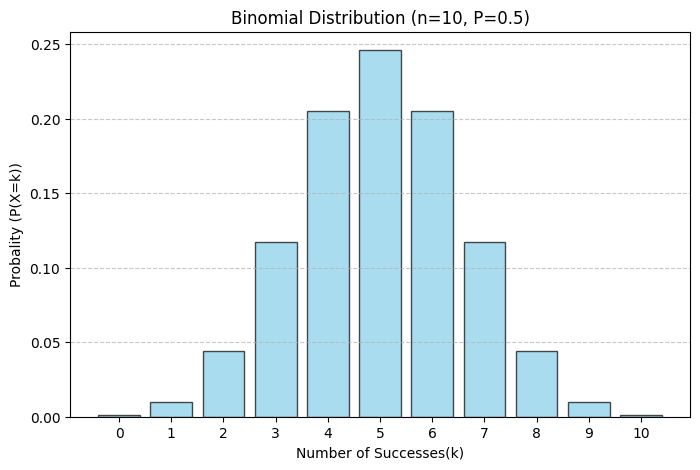

In [15]:
# Plotting PMF(Proability Mass Function)
plt.figure(figsize=(8,5))
plt.bar(k,binomial_pmf,color='skyblue',edgecolor='black',alpha=0.7)
plt.xlabel('Number of Successes(k)')
plt.ylabel('Probality (P(X=k))')
plt.title(f'Binomial Distribution (n={n}, P={p})')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.xticks(k)
plt.show()

### Purpose of xticks:

1. Readability

    If your x-axis values are overlapping, unreadable, or too frequent, xticks lets you rotate, space out, or replace them.

2. Custom Labels

    You can replace numeric ticks with meaningful labels (e.g., 0, 1, 2 → Low, Medium, High).

3. Focus

    You can show only specific tick marks instead of all, to keep the plot clean.

---

### Interpretation of PMF Plot

* The x-axis represents the number of success **k** in the trials.
* The y-axis represents the probability `P(X=k)` of observing exactly k successes.
* The height of each bar indicates the likelyhood of that specific outcome.
* The distribution if symmetric when p=0.5, but skews right(positively) if **p** is small and left(negetively) if **p** is large.
* The most probable value(mode) is near `np`.

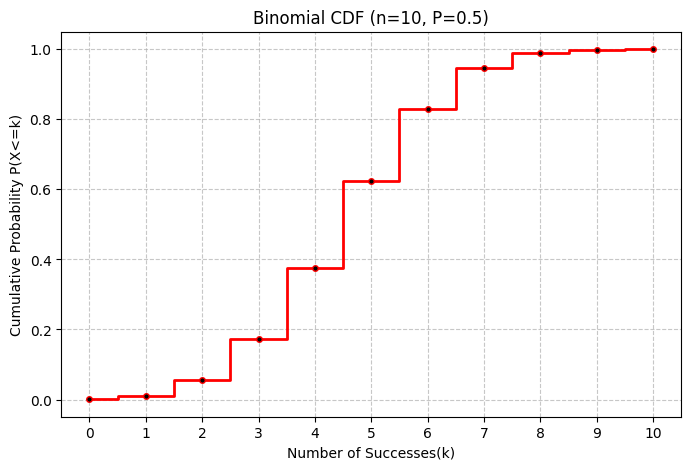

In [16]:
# Plotting CDF(Cumulative Distributive Function)
plt.figure(figsize=(8,5))
plt.step(k,binomial_cdf,color='red',where='mid',lw=2,marker='o',ms=4,mfc='black')
plt.xlabel('Number of Successes(k)')
plt.ylabel('Cumulative Probability P(X<=k)')
plt.title(f'Binomial CDF (n={n}, P={p})')
plt.grid(axis='both',ls='--',alpha=0.7)
plt.xticks(k)
plt.show()

In `plt.step(...)`, the **where** parameter controls where the vertical changes happen in the step plot — basically,
how the steps are aligned with x-values.

##### `where` parameter options:

* `'pre'` → Step changes happen before the x-value

* `'mid'` → Step changes happen centered on the x-value

* `'post'` → Step changes happen after the x-value

---

### Interpretation of CDF Plot

* The x-axis represents the number of sucesses **k** in the trials.
* The y-axis represents the Cumulative Probability **P(X<=k)**.
* The step function increases as the value of k increases, eventually reaching 1.
* At **k=0**, the probability is the same as the PMF at **k=0**.
* The plot helps in understanding the probability of getting up to a certain number of successes.


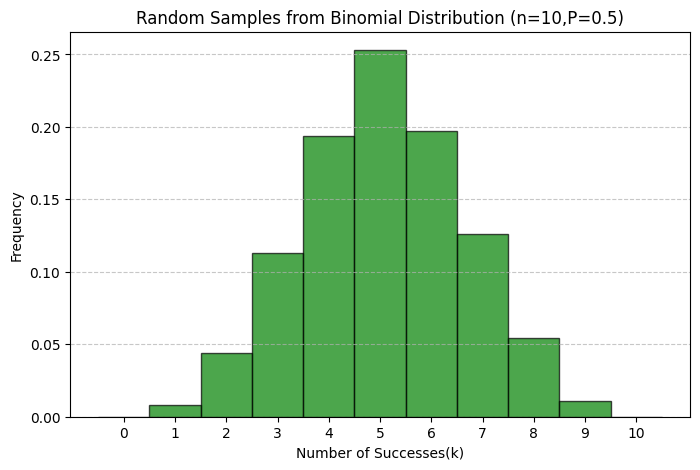

In [17]:
# Generate random samples from Binomial Distribution
sample = binom.rvs(n,p,size=1000)

plt.figure(figsize=(8,5))
plt.hist(sample, bins=np.arange(n+2)-0.5, density=True, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Successes(k)')
plt.ylabel('Frequency')
plt.title(f'Random Samples from Binomial Distribution (n={n},P={p})')
plt.grid(axis='y',ls='--',alpha=0.7)
plt.xticks(k)
plt.show()

The `.rvs` method stands for **Random Variates Sampling** — it generates random numbers from a given probability distribution.

For example:

    from scipy.stats import binom

    n = 10      # trials
    p = 0.5     # probability of success
    sample = binom.rvs(n, p, size=10)

    print(sample)

OUTPUT:`[4 5 7 3 6 5 4 6 5 4]`

Here, each number is the count of successes in 10 trials, and all are generated according to the binomial distribution.

#### Why use rvs?

* To simulate real-world random experiments.

* Useful for Monte Carlo simulations.

* Lets you test statistical methods with fake but realistically distributed data.

##### Compute Probability of Getting Exactly k Successes

For example, the probability of getting exactly 6 successes:

In [18]:
k = 6
prob = binom.pmf(k,n,p)
print(f"P(X={k}) = {prob:.4f}")

P(X=6) = 0.2051


### Poisson Distribution